## LAB 1 - Kanav Nanda - U20240086

### Step 3 - Importing Libraries

In [13]:
import cv2 # used for image processing
import numpy as np
import matplotlib.pyplot as plt

### Step 4 - Reading and Plotting the Image

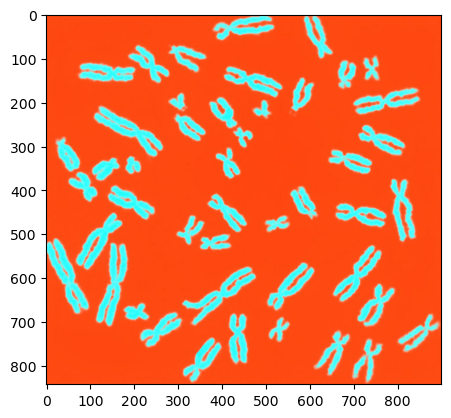

In [14]:
bgr_image = cv2.imread("Lab 1 Chromosomes.jpg")
plt.imshow(bgr_image)

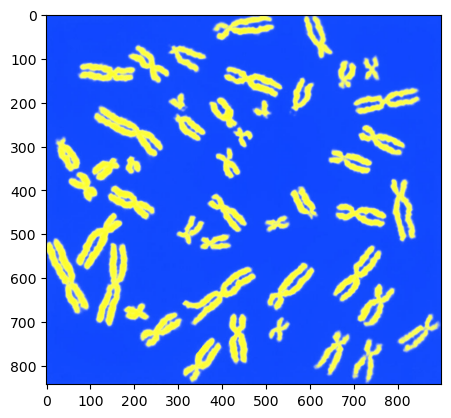

In [15]:
rgb_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2RGB) # did this step to get the orignal image provided in the question
plt.imshow(rgb_image)

### Step 5 - Converting to Grayscale

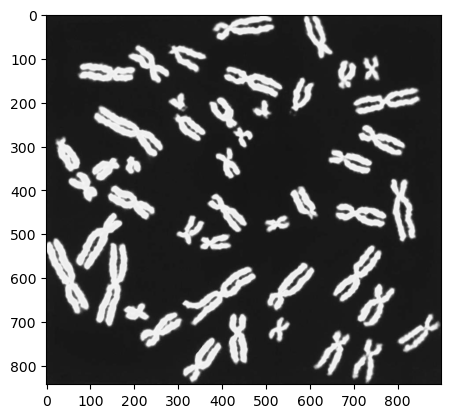

In [16]:
gray_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = "gray")
# converting to grayscale as we just need to detect the shape and also its computationally inexpensive
# used cmap as a parameter as it maps 0 to black and 1 to white and orignally the gray image was purplish

### Step 6 - Removing Background, binarization and countoring

#### a) Morphological Opening

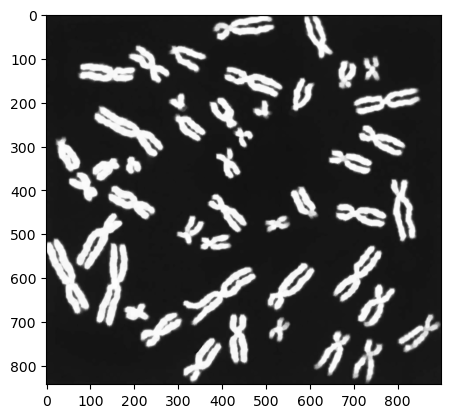

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))#through trail and error I reched this value
#used ellipse and chromosomes resembles its shape and rectangle gives more sharp edges
opened = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
plt.imshow(opened,cmap="gray")
# morphological opening is used for background removal, removing noise and helping chromosomes stand out
# morph_open because we used did erosion(noise remove) and then dialation(resizing)

#### b) Thresholding

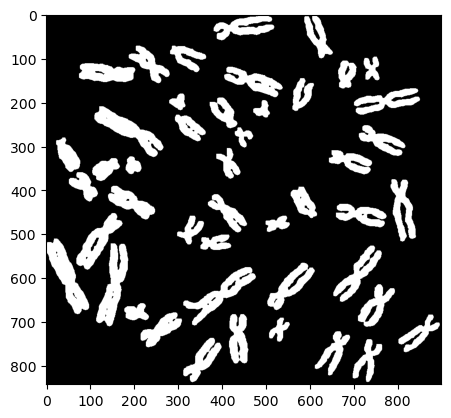

In [18]:
h, binary = cv2.threshold(opened, 127, 255, cv2.THRESH_BINARY) #for plotting binary is required
plt.imshow(binary,cmap="gray")

#### c) Countours

In [19]:
contours, g = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
# each contour will be one chromosome and retr_external ignores inner holes

46


### Step 7 - Extracting Features and Filtering

In [20]:
features = []
min_threshold = 5
if len(contours) >= min_threshold:
    for i in contours:
        x,y,w,h = cv2.boundingRect(i)
        area = cv2.contourArea(i)
        peri = cv2.arcLength(i, True)
        if peri == 0:
            continue
        circularity = (4*np.pi*area) / (peri**2)
        features.append([h,w,area,peri,circularity])
# looping through contours and measuring geometry
# h, w size
# peri - boundry
# area - mass
# close to 1 circularity would be helpful in recognising it as circular

### Step 8 - Boundary boxes

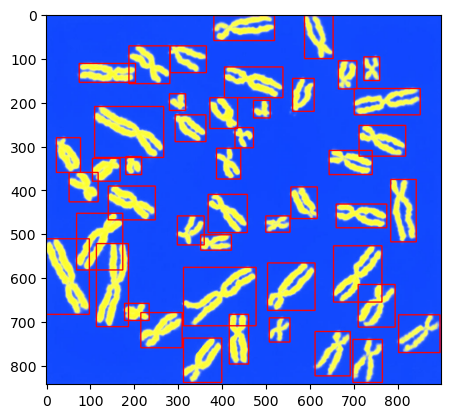

In [21]:
image_boxes = rgb_image.copy()
for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(image_boxes, (x, y), (x+w, y+h), (255,0,0), 2)
plt.imshow(image_boxes)

In [22]:
import pandas as pd
columns = ["height", "width", "area", "perimeter", "circularity"]
df = pd.DataFrame(features, columns=columns)
print(df)
#rows are chromosomes and colunms are the features

    height  width    area   perimeter  circularity
0       98     67  2472.5  404.977702     0.189445
1      101     87  3466.5  379.404108     0.302620
2      101     80  2806.0  429.445739     0.191197
3       55     47  1137.5  211.923880     0.318274
4       86     94  2585.5  434.658942     0.171972
5      113     44  3683.5  367.178713     0.343333
6       80     94  3247.0  311.906634     0.419414
7       39     56  1430.5  181.438598     0.546057
8       97     84  3642.5  336.634558     0.403917
9      133    165  5908.0  545.470123     0.249522
10     108    108  4388.0  357.646749     0.431090
11     128    110  4255.5  599.796025     0.148646
12     189     73  6267.5  603.747255     0.216070
13     172     98  6323.0  459.788885     0.375851
14      35     70  1699.0  238.852812     0.374233
15      37     55  1153.0  176.710677     0.463995
16      66     61  1627.0  264.450791     0.292353
17     129    105  4992.5  381.203099     0.431733
18      54    115  3324.0  458.

### Step 10 - Standardization and Normalization


#### a) Standardization

In [23]:
df_standardized = (df-df.mean())/df.std()
print(df_standardized)

      height     width      area  perimeter  circularity
0   0.515492 -0.415328 -0.296048   0.481852    -1.090047
1   0.600586  0.175246  0.388426   0.295063    -0.380485
2   0.600586 -0.031454 -0.066398   0.660567    -1.079066
3  -0.704177 -1.005902 -1.215336  -0.928211    -0.282336
4   0.175119  0.381947 -0.218235   0.698644    -1.199601
5   0.940958 -1.094488  0.537853   0.205769    -0.125226
6   0.004933  0.381947  0.237277  -0.197938     0.351775
7  -1.158008 -0.740143 -1.013575  -1.150876     1.145785
8   0.487128  0.086660  0.509620  -0.017326     0.254614
9   1.508247  2.478485  2.069656   1.508008    -0.713389
10  0.799136  0.795349  1.022976   0.136147     0.424979
11  1.366425  0.854407  0.931735   1.904804    -1.345845
12  3.096653 -0.238155  2.317209   1.933663    -0.923122
13  2.614458  0.500062  2.355427   0.882193     0.078653
14 -1.271465 -0.326742 -0.828684  -0.731523     0.068509
15 -1.214737 -0.769672 -1.204663  -1.185408     0.631284
16 -0.392169 -0.592500 -0.87826

#### a) Normalization

In [24]:
df_normalized = (df-df.min())/(df.max()-df.min())
print(df_normalized)

      height     width      area  perimeter  circularity
0   0.409091  0.240310  0.301687   0.555574     0.107393
1   0.428571  0.395349  0.481955   0.504541     0.303197
2   0.428571  0.341085  0.362169   0.604401     0.110423
3   0.129870  0.085271  0.059576   0.170329     0.330281
4   0.331169  0.449612  0.322180   0.614804     0.077162
5   0.506494  0.062016  0.521309   0.480145     0.373635
6   0.292208  0.449612  0.442147   0.369848     0.505264
7   0.025974  0.155039  0.112713   0.109495     0.724371
8   0.402597  0.372093  0.513874   0.419193     0.478452
9   0.636364  1.000000  0.924737   0.835931     0.211332
10  0.474026  0.558140  0.649075   0.461124     0.525464
11  0.603896  0.573643  0.625045   0.944340     0.036806
12  1.000000  0.286822  0.989935   0.952225     0.153456
13  0.889610  0.480620  1.000000   0.664951     0.429896
14  0.000000  0.263566  0.161407   0.224067     0.427096
15  0.012987  0.147287  0.062387   0.100060     0.582394
16  0.201299  0.193798  0.14835

## Questions

##### • Q1: How can contour detection be used to identify objects in an image?

Ans - Contour detection finds the outlines of objects in a binary image. Each closed contour represents one object, which can then be isolated and anylzed

##### • Q2: What is the importance of standardization of data? What difference did you observe before and after standardization?


Ans - Standardization puts all features on a similar scale. Before standardization, large values like area dominated, while after standardization all features scales down and balances.

##### • Q3: Let’s consider one of the values in the width column is missing. How to handle this missing value?


Ans - The missing value can be imputed using the mean or median of the width column. This helps in analyzing the whole date without errors

##### • Q4: What is the importance of data normalization? What difference did you observe before and after normalization?

Ans - Normalization scales all values between 0 and 1. After normalization features became easier to compare.

##### • Q5: How might you adapt the bounding box construction process to handle overlapping or touching chromosomes?

Ans - Overlapping chromosomes can be separated using better image processing methods like morphological operations

## THANK-YOU!